# Get the MVP - the mood of the song

## Import stuff

In [133]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline

## Load data

In [134]:
data = pd.read_csv('./data_top10c_more_lyrics.csv')

In [135]:
data.head(3)

,Unnamed: 0,Position,Streams,Track Name,Artist,ID,Date,Year,Month,Day,Country,Region,Lyrics,Acousticness,Energy,Instrumentalness,Mode,Tempo,Valence
0,0,177,40381,Bye Bye Bye,*NSYNC,4r8lRYnoOGdEi6YyI5OC1o,2017-10-05,2017,10,5,gb,eu,"hey, hey bye bye bye, bye bye bye bye i'm doi...",0.0408,0.928,0.00104,0.0,172.656,0.879
1,1,151,24132,"Merry Christmas, Happy Holidays",*NSYNC,15coTBAzEN1bOeipoNDZAR,2017-12-23,2017,12,23,it,eu,merry christmas and happy holidays merry chris...,0.1030,0.939,0.00000,1.0,105.003,0.756
2,2,78,49766,"Merry Christmas, Happy Holidays",*NSYNC,15coTBAzEN1bOeipoNDZAR,2017-12-24,2017,12,24,it,eu,merry christmas and happy holidays merry chris...,0.1030,0.939,0.00000,1.0,105.003,0.756


## Work the data a tiny bit

GOAL:<BR />
Focus on the columns that wont change (for each song/one song per row) -> predict mood (happy , neutral, sad) for song.<BR />

The columns will be:
- Track Name (general info)
- Artist (general info)
- ID (general info)
- Lyrics (TextBlob)
- Acousticness (make sure numerical)
- Energy (make sure numerical)
- Instrumentalness (make sure numerical)
- Mode (make sure numerical)
- Tempo (make sure numerical)
- Valence (make sure numerical)

**Drop rows that are duplicates and keep only one row for each song**

In [136]:
data_per_song = data.drop_duplicates(subset=['Track Name'], keep='first')

**Drop all columns that might change per song**

In [137]:
mvp_data = data_per_song.drop(['Unnamed: 0', 'Position', 'Streams', 'Date', 'Year', 'Month', 'Day', 'Country', 'Region'], axis=1)

mvp_data.head(5)

,Track Name,Artist,ID,Lyrics,Acousticness,Energy,Instrumentalness,Mode,Tempo,Valence
0,Bye Bye Bye,*NSYNC,4r8lRYnoOGdEi6YyI5OC1o,"hey, hey bye bye bye, bye bye bye bye i'm doi...",0.04080,0.928,0.001040,0.0,172.656,0.8790
1,"Merry Christmas, Happy Holidays",*NSYNC,15coTBAzEN1bOeipoNDZAR,merry christmas and happy holidays merry chris...,0.10300,0.939,0.000000,1.0,105.003,0.7560
43,Douce Nuit,-M-,4EOJWkvkVDpkZrhC8iTDsI,NaN,0.91400,0.227,0.163000,1.0,81.887,0.0498
44,Zomersessie,101Barz,3ypzzvHUfgwyqxhL9ym4fH,NaN,0.00818,0.403,0.000021,1.0,155.748,0.3650
47,Zomersessie (feat. 3robi),101Barz,2re4cLViiQw0NZZx5KUpV8,NaN,0.00818,0.403,0.000021,1.0,155.748,0.3650


**Look at missing values and data type**

In [138]:
mvp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6919 entries, 0 to 578929
Data columns (total 10 columns):
Track Name          6919 non-null object
Artist              6919 non-null object
ID                  6919 non-null object
Lyrics              4190 non-null object
Acousticness        6918 non-null float64
Energy              6918 non-null float64
Instrumentalness    6918 non-null float64
Mode                6918 non-null float64
Tempo               6918 non-null float64
Valence             6918 non-null float64
dtypes: float64(6), object(4)
memory usage: 594.6+ KB


**Look at number off missing values in the Lyrics column**

In [139]:
mvp_data['Lyrics'].isnull().sum()

2729

**Look at the share of Tracks that have no Lyric**

In [140]:
2729/6919

0.39442115912704145

*I am missing lyrics for 39% of my songs -> I have lyrics for 61% of my songs*

### TextBlob

**Turn the lyrics in the Lyrics column into string**

In [141]:
mvp_data['Lyrics'] = mvp_data['Lyrics'].astype(str)

**Make and run function for TextBlob on the Lyrics**

Source: https://stackoverflow.com/questions/43485469/apply-textblob-in-for-each-row-of-a-dataframe

In [142]:
def sentiment_func(lyrics):
    try:
        return TextBlob(lyrics).sentiment
    except:
        return None

mvp_data['pol_sub'] = mvp_data['Lyrics'].apply(sentiment_func)

**Look at the new column with Polarity and Subjectivity from TextBlob**<BR />
Polarity (-1 to +1) (negative, positive)<BR />
Subjectivity (0 to 1) (objective, subjective)

In [143]:
mvp_data['pol_sub'].head(3)

0     (-0.044454619454619454, 0.5908017908017905)
1        (0.5831501831501833, 0.6706959706959708)
43                                     (0.0, 0.0)
Name: pol_sub, dtype: object

**Change order of the columns in the data frame**

In [144]:
mvp_data = mvp_data[['Track Name', 'Artist', 'ID', 'Lyrics', 'pol_sub', 'Acousticness', 'Energy', 'Instrumentalness',
                     'Mode', 'Tempo', 'Valence']]

**Split the pol_sub column into 2 new columns (Polarity, Subjectivity)**

In [145]:
mvp_data['pol_sub'][0][0]

mvp_data['Polarity'] = mvp_data['pol_sub'].apply(lambda x: x[0])
mvp_data['Subjectivity'] = mvp_data['pol_sub'].apply(lambda x: x[1])

mvp_data.head(3)

,Track Name,Artist,ID,Lyrics,pol_sub,Acousticness,Energy,Instrumentalness,Mode,Tempo,Valence,Polarity,Subjectivity
0,Bye Bye Bye,*NSYNC,4r8lRYnoOGdEi6YyI5OC1o,"hey, hey bye bye bye, bye bye bye bye i'm doi...","(-0.044454619454619454, 0.5908017908017905)",0.0408,0.928,0.00104,0.0,172.656,0.8790,-0.044455,0.590802
1,"Merry Christmas, Happy Holidays",*NSYNC,15coTBAzEN1bOeipoNDZAR,merry christmas and happy holidays merry chris...,"(0.5831501831501833, 0.6706959706959708)",0.1030,0.939,0.00000,1.0,105.003,0.7560,0.583150,0.670696
43,Douce Nuit,-M-,4EOJWkvkVDpkZrhC8iTDsI,nan,"(0.0, 0.0)",0.9140,0.227,0.16300,1.0,81.887,0.0498,0.000000,0.000000


**Drop rows that have missing values in the Lyrics column**<BR />
nan is a string and not a np.nan value<BR />
I can filter insted of using dropnan or notnull

In [146]:
mvp_data1 = mvp_data[mvp_data['Lyrics'] != 'nan']

**Check that things seem to have worked out as expected**

In [147]:
len(mvp_data1)

4190

In [148]:
mvp_data1.head(3)

,Track Name,Artist,ID,Lyrics,pol_sub,Acousticness,Energy,Instrumentalness,Mode,Tempo,Valence,Polarity,Subjectivity
0,Bye Bye Bye,*NSYNC,4r8lRYnoOGdEi6YyI5OC1o,"hey, hey bye bye bye, bye bye bye bye i'm doi...","(-0.044454619454619454, 0.5908017908017905)",0.0408,0.928,0.00104,0.0,172.656,0.879,-0.044455,0.590802
1,"Merry Christmas, Happy Holidays",*NSYNC,15coTBAzEN1bOeipoNDZAR,merry christmas and happy holidays merry chris...,"(0.5831501831501833, 0.6706959706959708)",0.1030,0.939,0.00000,1.0,105.003,0.756,0.583150,0.670696
48,Somme,13 Block,2xkxBVJHf9jQsq7g46UtQx,"J'ai fait l'aller, j'suis sur le retour\nLa ma...","(0.1738095238095238, 0.5416666666666666)",0.4940,0.678,0.00151,0.0,79.979,0.528,0.173810,0.541667


**Drop the pol_sub column**

In [149]:
mvp_data1 = mvp_data1.drop(['pol_sub'], axis=1)

**Change the order of the columns**

In [150]:
mvp_data1 = mvp_data1[['Track Name', 'Artist', 'ID', 'Lyrics', 'Polarity', 'Subjectivity', 'Acousticness', 'Energy', 'Instrumentalness',
                     'Mode', 'Tempo', 'Valence']]

mvp_data1.columns

Index(['Track Name', 'Artist', 'ID', 'Lyrics', 'Polarity', 'Subjectivity',
       'Acousticness', 'Energy', 'Instrumentalness', 'Mode', 'Tempo',
       'Valence'],
      dtype='object')

### Do a quick check of the entire data frame

In [151]:
mvp_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4190 entries, 0 to 578929
Data columns (total 12 columns):
Track Name          4190 non-null object
Artist              4190 non-null object
ID                  4190 non-null object
Lyrics              4190 non-null object
Polarity            4190 non-null float64
Subjectivity        4190 non-null float64
Acousticness        4190 non-null float64
Energy              4190 non-null float64
Instrumentalness    4190 non-null float64
Mode                4190 non-null float64
Tempo               4190 non-null float64
Valence             4190 non-null float64
dtypes: float64(8), object(4)
memory usage: 425.5+ KB


In [152]:
mvp_data1.describe()

,Polarity,Subjectivity,Acousticness,Energy,Instrumentalness,Mode,Tempo,Valence
count,4190.000000,4190.000000,4190.000000,4190.000000,4190.000000,4190.000000,4190.000000,4190.000000
mean,0.071806,0.453405,0.238886,0.660887,0.009918,0.541050,120.254388,0.482520
std,0.225631,0.228036,0.234458,0.165181,0.065771,0.498372,26.560422,0.221104
min,-1.000000,0.000000,0.000003,0.027900,0.000000,0.000000,54.082000,0.037100
25%,-0.033272,0.350000,0.051525,0.562000,0.000000,0.000000,99.984250,0.310000
50%,0.046612,0.487500,0.159000,0.676000,0.000000,1.000000,120.004000,0.473000
75%,0.189943,0.591449,0.368000,0.784750,0.000038,1.000000,136.044750,0.654000
max,1.000000,1.000000,0.988000,0.995000,0.890000,1.000000,232.690000,0.982000


## Train/Test-split

Divide the data into a train and a test set (with a test set of 25%, which is also default)<BR />
If there is time go back to this step and change random seed/state.
Ultimatly do this 3 times.

In [153]:
dep   = mvp_data1['Valence']
indep = mvp_data1

In [154]:
indep_train, indep_test, dep_train, dep_test = train_test_split(indep, dep, test_size = 0.25, random_state=24)

## EDA

In [155]:
len(indep_train)

3142

**Make histograms to look at distribution**

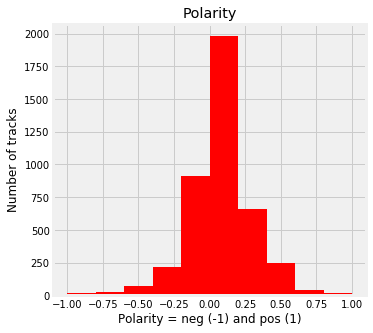

In [156]:
# Polarity
mvp_data1['Polarity'].plot(kind='hist', figsize=(5,5), color='red'); 
plt.xlabel('Polarity = neg (-1) and pos (1)');
plt.ylabel('Number of tracks');
plt.title('Polarity');

**Make many histograms to look at distribution**

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


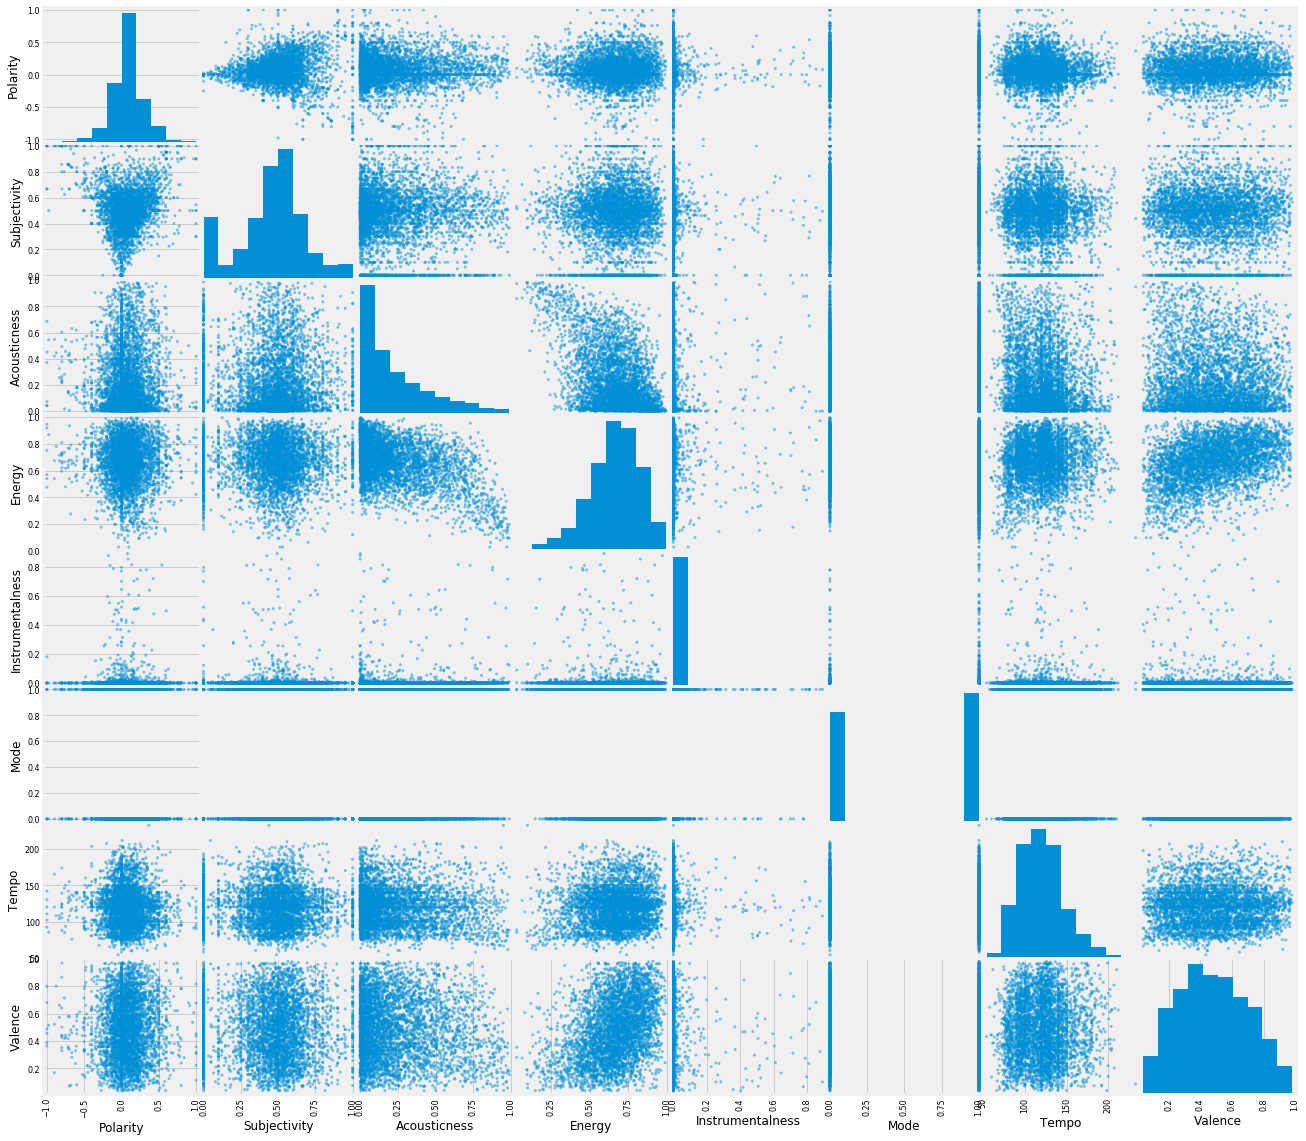

In [157]:
fig, ax = plt.subplots(figsize=(20,20))
pd.plotting.scatter_matrix(mvp_data1.iloc[:,[4,5,6,7,8,9,10,11]].astype(float), ax=ax);

**Make a heatmap**

## Define: Happy, Neutral and Sad

### TextBlob
http://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis<BR />

**Polarity**<BR />
Range: -1.0 to +1.0 (negative, positive)<BR />

**Subjectivity**<BR />
Range: 0.0 to 1.0 (objective, subjective)


### Spotify Web API

https://developer.spotify.com/web-api/object-model/<BR />

**Acousticness**<BR />
Range: 0.0 to 1.0 (non-acoustic, acoustic)

**Energy (intensity and activity)**<BR />
Range: 0.0 to 1.0 (non-energetic, energetic)

**Instrumentalness**<BR />
Range: 0.0 to 1.0 (vocal, non-vocal)

**Mode (modality: major or minor)**<BR />
Range: 0.0 to 1.0 (monir, major)

**Tempo (BPM)**<BR />
Range: 0.0 to 1.0 (low tempo, high tempo)

**Valence (this is the target varable)**<BR />
Range: 0.0 to 1.0 (negative, positive -> sad, happy)

## Models

In [ ]:

# PCA
# happy/sad = classification 
# valence 0-1 = regression (feature_importances_)
# happy/neutral/sad = multi-classification (ex. logreg one-against the rest. make the model 3 times) NN can do it all at once
# logreg, linreg (coef_), RF etc.